In [62]:
import numpy as np
import matplotlib.pyplot as plt
import quimb as qu

In [63]:
Z=np.array([[1,0],[0,-1]])

In [64]:
def op(L):
    a=0
    for i in range(L):
        a=a+(np.kron(np.eye(2**i),np.kron(Z,np.eye(2**(L-1-i)))))
    return(a)
    
def mag(L):
    m=[]
    I=np.eye(2**L)
    for x in range(2**L):
        psi=I[:,x]
        mg=np.dot(np.transpose(psi),np.dot(op(L),psi))
        m.append(mg)
    l=[-1*i for i in m]
    x=np.argsort(l)
    return(x)     


def P1(L):
    arr=np.eye(2**L)
    p1=np.zeros((2**L,2**L))
    x=mag(L)
    for i in range(len(x)):
        p1[i,:]=arr[x[i],:]
    return(p1)    
    

In [69]:
L=4

In [70]:
p1=P1(L)
p1t=np.transpose(p1)

H=qu.ham_heis(L,j=1,b=0,cyclic=False)


M=np.dot(p1,np.dot(H,p1t))

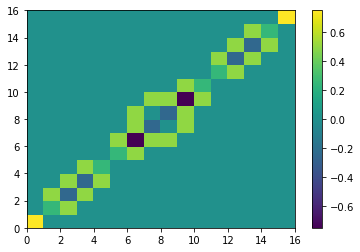

In [72]:
plt.pcolormesh(M)
plt.colorbar()